In [2]:
# PYTHON-14. Очистка данных
# 2. Знакомство с новыми данными: данные о квартирах от Сбера

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.expand_frame_repr', False)

sber_data = pd.read_csv('data/sber_data.csv')

In [3]:
sber_data['life_sq'].describe()

count    24088.000000
mean        34.403271
std         52.285733
min          0.000000
25%         20.000000
50%         30.000000
75%         43.000000
max       7478.000000
Name: life_sq, dtype: float64

In [4]:
print(sber_data[sber_data['life_sq'] == 0].shape)

(45, 61)


In [5]:
display(sber_data[sber_data['life_sq'] > 7000])

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
13546,13549,79,7478.0,8.0,Poselenie Voskresenskoe,NaN,0,NaN,0,0,...,5.072389,1.210613,0.826052,1.582378,0.756119,21.472421,14.917332,no data,0,7705000


In [7]:
outliers = sber_data[sber_data['life_sq'] > sber_data['full_sq']]
print(outliers.shape)

(37, 61)


In [8]:
cleaned = sber_data.drop(outliers.index, axis=0)
print(f'Result records: {cleaned.shape[0]}')

Result records: 30434


In [9]:
display(sber_data['floor'].describe())

count    30304.000000
mean         7.670803
std          5.319989
min          0.000000
25%          3.000000
50%          6.500000
75%         11.000000
max         77.000000
Name: floor, dtype: float64

In [10]:
display(sber_data[sber_data['floor']>50])

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
23584,23587,57,33.0,77.0,Lomonosovskoe,3091.0,5,8359.0,7,1,...,0.310557,0.731683,0.489763,0.86354,0.863266,2.920671,2.757058,satisfactory,0,13700000


Text(0.5, 1.0, 'Full Square Boxplot')

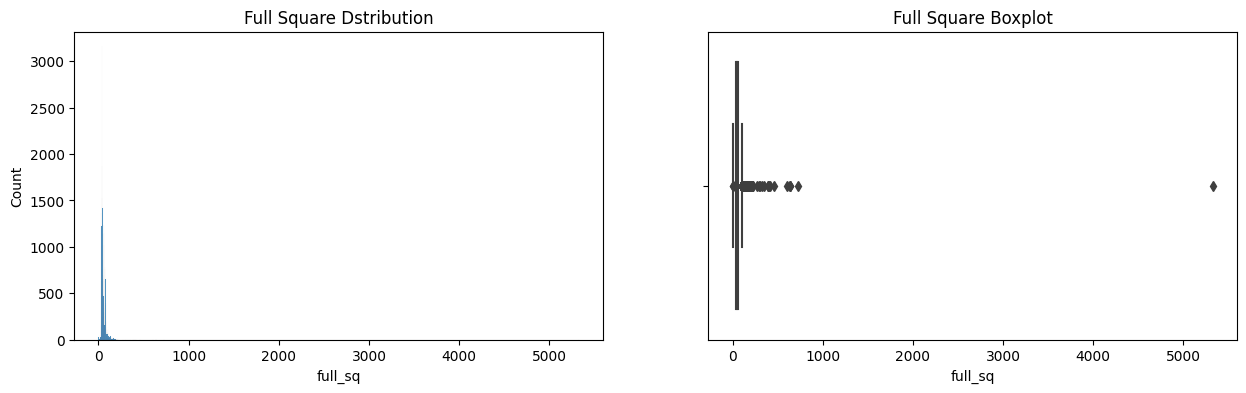

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
histplot = sns.histplot(data=sber_data, x='full_sq', ax=axes[0]);
histplot.set_title('Full Square Dstribution')
boxplot = sns.boxplot(data=sber_data, x='full_sq', ax=axes[1])
boxplot.set_title('Full Square Boxplot')

In [23]:
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - iqr * 1.5
    upper_bound = quartile_3 + iqr * 1.5
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_iqr(sber_data, 'full_sq')
print(f'Всего данных:{sber_data.shape[0]}')
print(f'Число выбросов по методу Тьюки:{outliers.shape[0]}')
print(f'Результируещее число записей:{cleaned.shape[0]}')

Всего данных:30471
Число выбросов по методу Тьюки:963
Результируещее число записей:29508


Text(0.5, 1.0, 'Cleanded Full Square Boxplot')

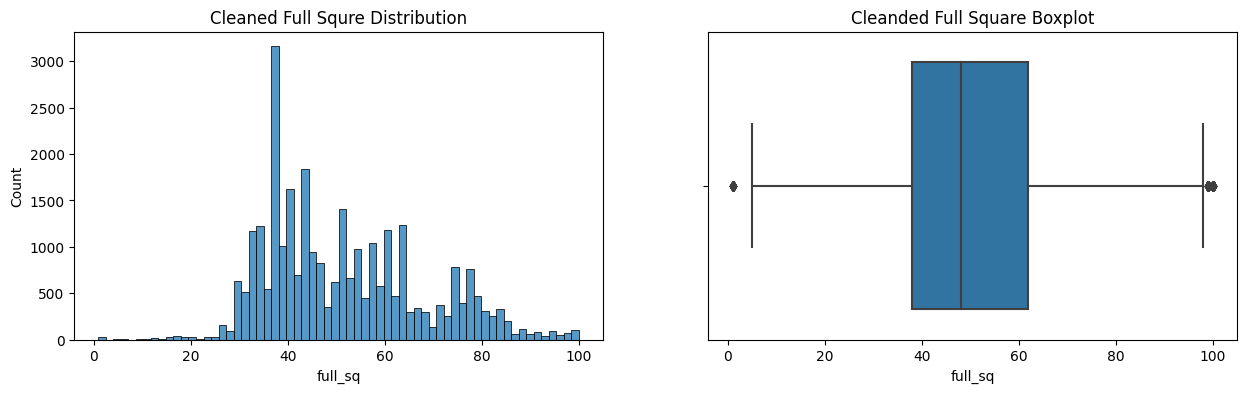

In [25]:
fix, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='full_sq', ax=axes[0])
histplot.set_title('Cleaned Full Squre Distribution')
boxplot = sns.boxplot(data=cleaned, x='full_sq', ax=axes[1])
boxplot.set_title('Cleanded Full Square Boxplot')

Всего данных:30471
Число выбросов по методу Тьюки:963
Результируещее число записей:29508
Всего данных:30471
Число выбросов по методу Тьюки:59
Результируещее число записей:30403


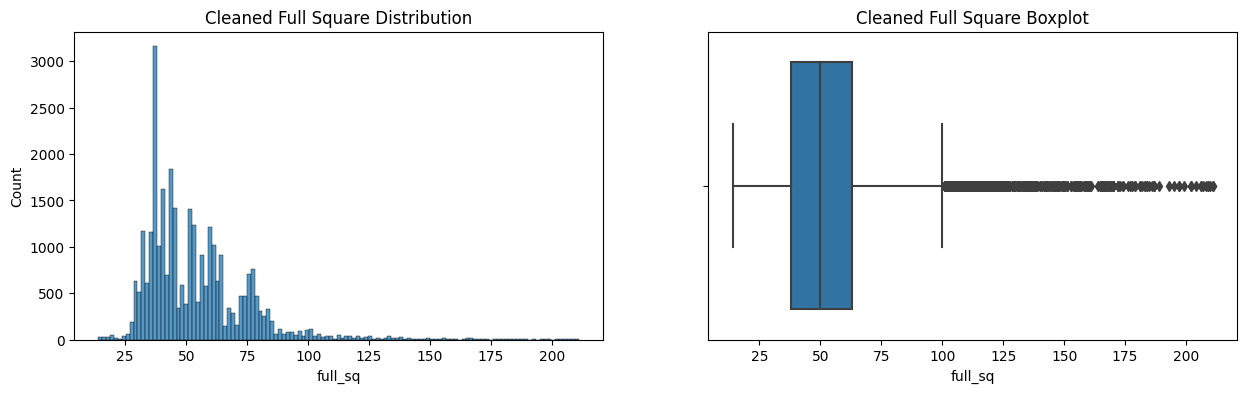

In [32]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - iqr * left
    upper_bound = quartile_3 + iqr * right
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr_mod(sber_data, 'full_sq')
print(f'Всего данных:{sber_data.shape[0]}')
print(f'Число выбросов по методу Тьюки:{outliers.shape[0]}')
print(f'Результируещее число записей:{cleaned.shape[0]}')

outliers, cleaned = outliers_iqr_mod(sber_data, 'full_sq', 1, 6)
print(f'Всего данных:{sber_data.shape[0]}')
print(f'Число выбросов по методу Тьюки:{outliers.shape[0]}')
print(f'Результируещее число записей:{cleaned.shape[0]}')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='full_sq', ax=axes[0]);
histplot.set_title('Cleaned Full Square Distribution');
boxplot = sns.boxplot(data=cleaned, x='full_sq', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot');

-0.14263612203024953


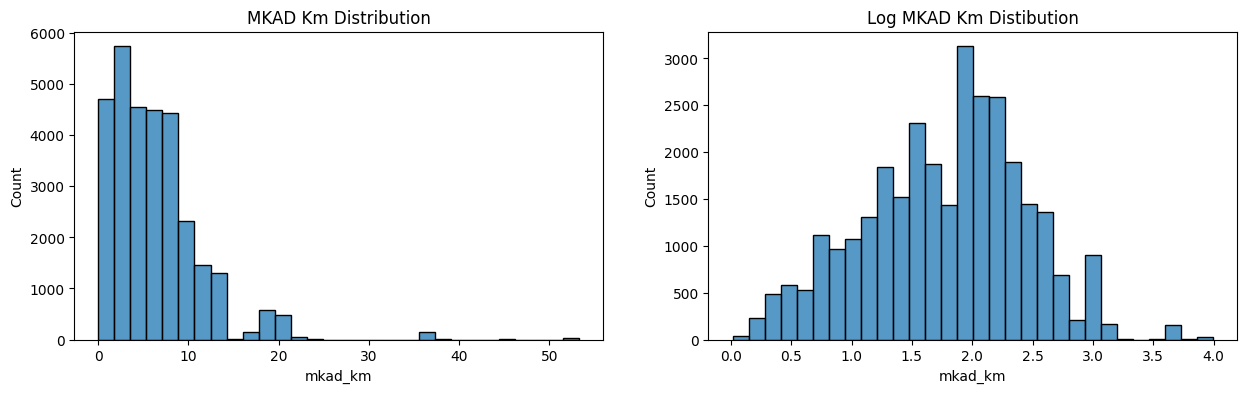

In [35]:
fix, axes = plt.subplots(1, 2, figsize=(15,4))

# гистограмма исходного признака
histplot = sns.histplot(sber_data['mkad_km'], bins=30, ax=axes[0])
histplot.set_title('MKAD Km Distribution')

# гистограмма в логарифмическом масштабе
log_mkad_km = np.log(sber_data['mkad_km'] + 1)
histplot = sns.histplot(log_mkad_km, bins=30, ax=axes[1])
histplot.set_title('Log MKAD Km Distibution')
print(log_mkad_km.skew())

In [41]:
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature] + 1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score(sber_data, 'mkad_km', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результируещее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 33
Результируещее число записей: 30438


In [42]:
print(outliers['sub_area'].unique())

['Poselenie Rogovskoe' 'Poselenie Kievskij']


Text(0.5, 1.0, 'Log MKAD Km Distribution')

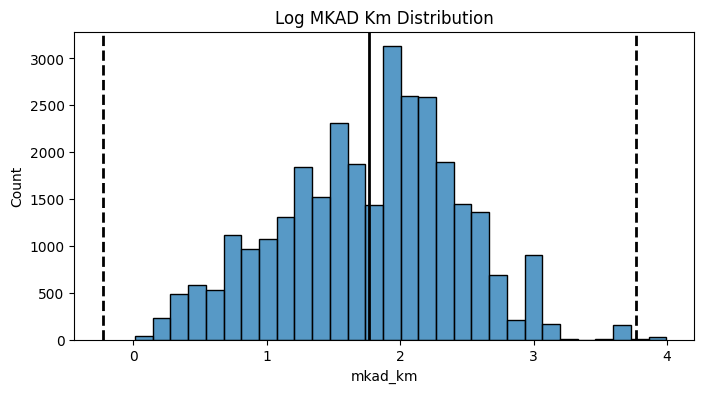

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
log_mkad_km = np.log(sber_data['mkad_km'] + 1)
histplot = sns.histplot(log_mkad_km, bins=30, ax = ax)
histplot.axvline(log_mkad_km.mean(), color='k', lw=2)
histplot.axvline(log_mkad_km.mean() + 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.axvline(log_mkad_km.mean() - 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.set_title('Log MKAD Km Distribution')


In [48]:
def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=False):
    if log_scale:
        x = np.log(data[feature] + 1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score_mod(sber_data, 'mkad_km', log_scale=True, left=3, right=3.5)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результируещее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 0
Результируещее число записей: 30471


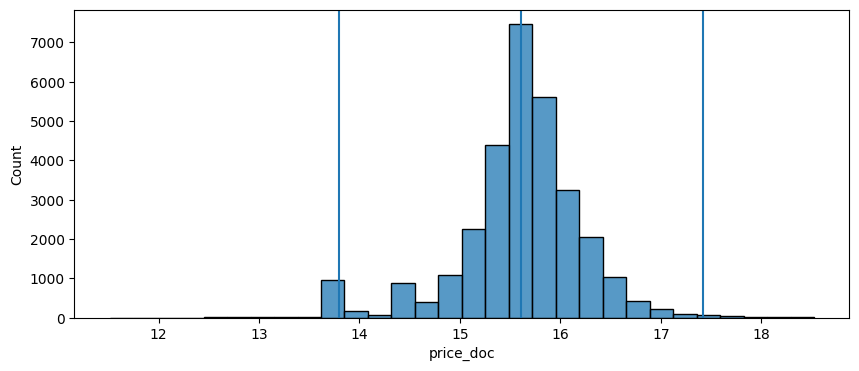

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(10,4))
log_price_doc = np.log(sber_data['price_doc'] + 1)
histplot = sns.histplot(log_price_doc, bins=30, ax=ax)
histplot.axvline(log_price_doc.mean())
histplot.axvline(log_price_doc.mean() - 3 * log_price_doc.std())
histplot.axvline(log_price_doc.mean() + 3 * log_price_doc.std())


In [57]:
o, c = outliers_z_score_mod(sber_data, 'price_doc', log_scale=True, left=3.7, right=3.7)
print(o.shape[0], c.shape[0])

52 30419


In [62]:
def outliers_iqr_mod2(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - iqr * left
    upper_bound = quartile_3 + iqr * right
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr_mod2(sber_data, 'price_doc', 3, 3, True)
print(f'Число выбросов по методу Тьюки:{outliers.shape[0]}')
print(f'Результируещее число записей:{cleaned.shape[0]}')


Число выбросов по методу Тьюки:92
Результируещее число записей:30379
